<h1>EDA </h1>

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import numpy as np


PATH_TO_DATA = os.path.join('..', 'data')

In [3]:
df_train = pd.read_parquet(os.path.join(PATH_TO_DATA, 'train.parquet'))
df_test = pd.read_parquet(os.path.join(PATH_TO_DATA, 'test.parquet'))

df_train.head()

,id,dates,values,label
0,19114,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[-1.86, 0.79, 1.4, 0.15, 0.0, -1.24, -1.46, 3....",0.0
1,22769,"[2016-05-01, 2016-06-01, 2016-07-01, 2016-08-0...","[-1.04, -3.48, 0.05, -0.13, -0.01, 0.03, 0.27,...",1.0
2,76935,"[2017-03-01, 2017-04-01, 2017-05-01, 2017-06-0...","[0.28, 0.63, 0.06, 0.96, -1.4, -0.3, 1.62, 1.1...",0.0
3,66297,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[-0.33, 0.58, 1.1, -0.56, -0.95, -0.61, -0.7, ...",0.0
4,2191,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[1.31, 0.5, -0.54, 0.95, 0.65, 0.83, -1.55, -0...",0.0


Проверка на пропуски

In [4]:
df_train.isna().sum()

id        0
dates     0
values    0
label     0
dtype: int64

In [5]:
print(f'Рядов, содержащих NaN: {df_train["values"].apply(lambda x: np.isnan(x).any()).sum()}')

Рядов, содержащих NaN: 88


In [6]:
df_train = df_train[~df_train['values'].apply(lambda x: np.isnan(x).any())]

Ниже представлены доли классов. Датасет несбалансирован.

In [7]:
df_train.groupby('label')['label'].count() / len(df_train)

label
0.0    0.723108
1.0    0.276892
Name: label, dtype: float64

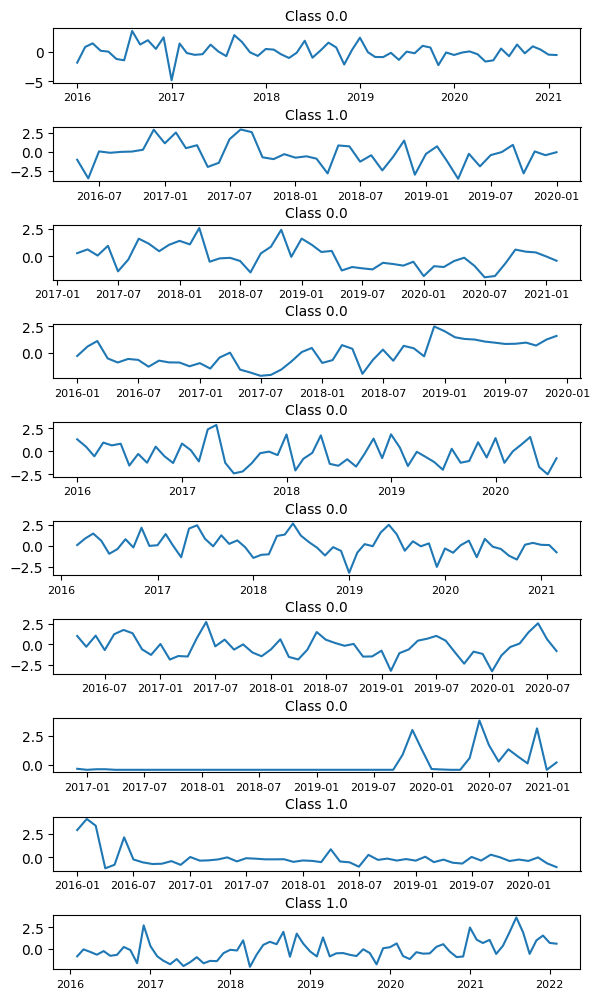

In [8]:
_, axes = plt.subplots(10, 1, figsize=(6, 10))
plt.tight_layout()
for i in range(10):
    row = df_train.iloc[i]
    axes[i].plot(row['dates'], row['values'])
    axes[i].set_title('Class ' + str(row.label), fontsize=10)
    axes[i].xaxis.set_tick_params(labelsize=8)

Данные различаются по числу записей:

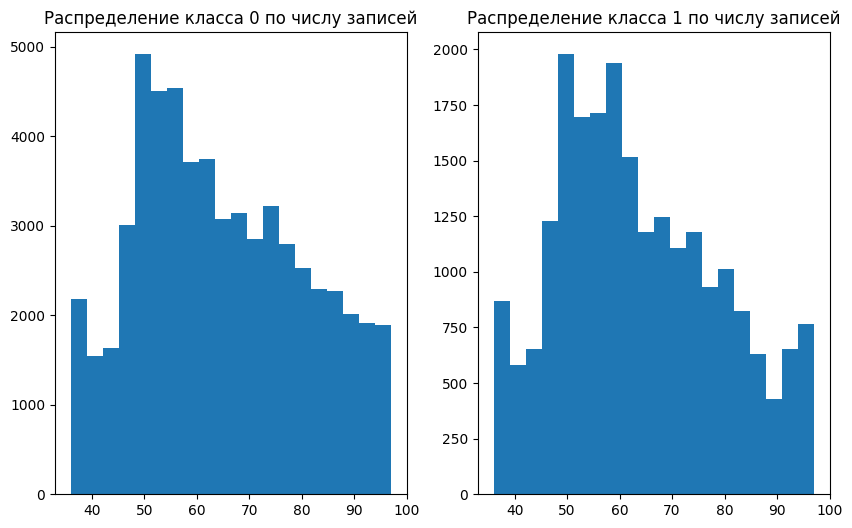

In [9]:
_, axes = plt.subplots(1, 2, figsize=(10, 6))
axes[0].hist(df_train[df_train.label==0].dates.apply(lambda x: len(x)), bins=20)
axes[0].set_title('Распределение класса 0 по числу записей')
axes[1].hist(df_train[df_train.label==1].dates.apply(lambda x: len(x)), bins=20)
axes[1].set_title('Распределение класса 1 по числу записей')
plt.show()

In [10]:
print(f"Минимальное число записей: {df_train['values'].apply(lambda x: len(x)).min()}")
print(f"Максимальное число записей: {df_train['values'].apply(lambda x: len(x)).max()}")

Минимальное число записей: 36
Максимальное число записей: 97


Разница в числе записей слишком велика, поэтому не стоит применять интерполяцию коротких временных рядов или обрезку длинных - это приведет к потере информациии и ухудшению предсказательной способности модели.

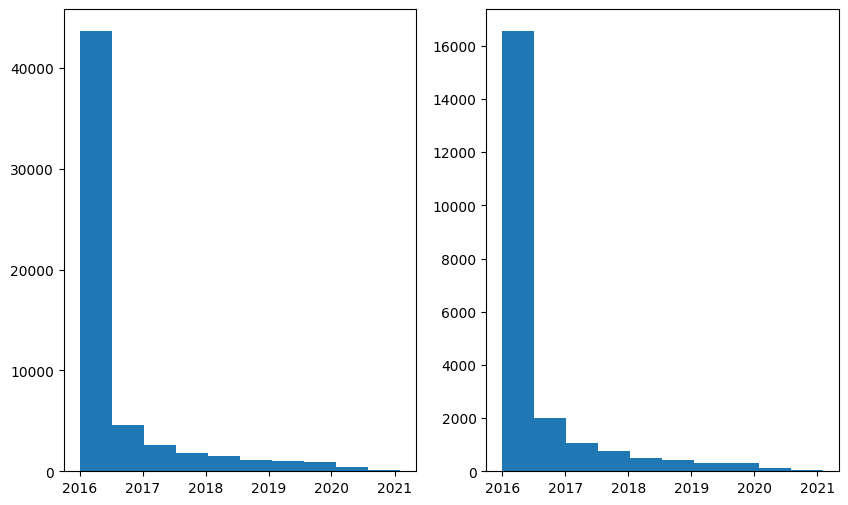

In [13]:
_, axes = plt.subplots(1, 2, figsize=(10, 6))
axes[0].hist(df_train[df_train.label==0].dates.apply(lambda x: x[0]))
axes[1].hist(df_train[df_train.label==1].dates.apply(lambda x: x[0]))
plt.show()


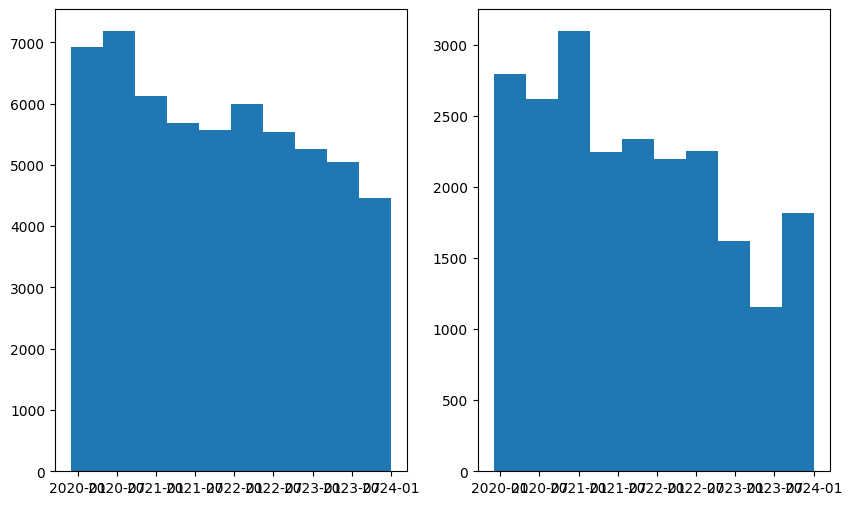

In [14]:
_, axes = plt.subplots(1, 2, figsize=(10, 6))
axes[0].hist(df_train[df_train.label==0].dates.apply(lambda x: x[-1]))
axes[1].hist(df_train[df_train.label==1].dates.apply(lambda x: x[-1]))
plt.show()

In [11]:
df_train['length'] = df_train['values'].apply(lambda x: len(x))
df_train['mean'] = df_train['values'].apply(lambda x: x.mean())
df_train['std'] = df_train['values'].apply(lambda x: x.std())
df_train['median'] = df_train['values'].apply(lambda x: np.median(x))
df_train['zeros'] = df_train['values'].apply(lambda x:(x[:-1] * x[1:] < 0).sum()) / df_train['length']
df_train['max'] = df_train['values'].apply(lambda x: x.max())
df_train['min'] = df_train['values'].apply(lambda x: x.min())

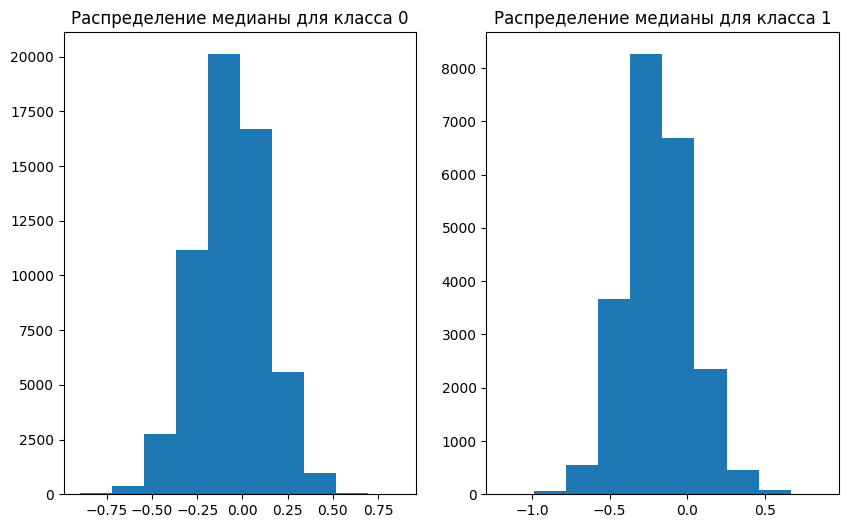

In [12]:
_, axes = plt.subplots(1, 2, figsize=(10, 6))
axes[0].hist(df_train[df_train.label==0]['median'])
axes[0].set_title('Распределение медианы для класса 0')
axes[1].hist(df_train[df_train.label==1]['median'])
axes[1].set_title('Распределение медианы для класса 1')
plt.show()

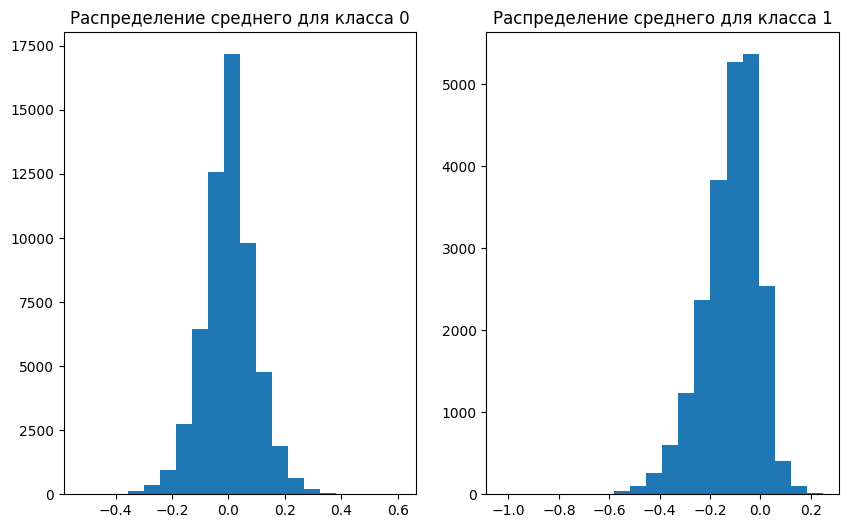

In [13]:
_, axes = plt.subplots(1, 2, figsize=(10, 6))
axes[0].hist(df_train[df_train.label==0]['mean'], bins=20)
axes[0].set_title('Распределение среднего для класса 0')
axes[1].hist(df_train[df_train.label==1]['mean'], bins=20)
axes[1].set_title('Распределение среднего для класса 1')
plt.show()

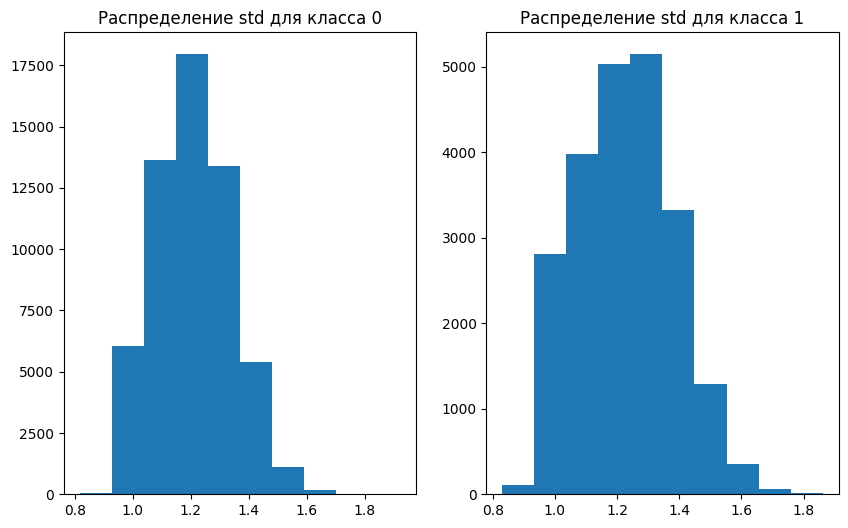

In [14]:
_, axes = plt.subplots(1, 2, figsize=(10, 6))
axes[0].hist(df_train[df_train.label==0]['std'])
axes[0].set_title('Распределение std для класса 0')
axes[1].hist(df_train[df_train.label==1]['std'])
axes[1].set_title('Распределение std для класса 1')
plt.show()

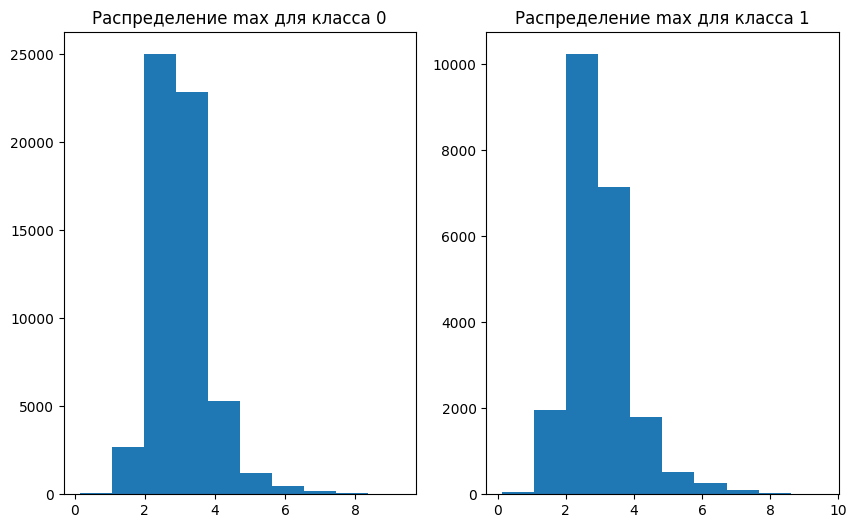

In [15]:
_, axes = plt.subplots(1, 2, figsize=(10, 6))
axes[0].hist(df_train[df_train.label==0]['max'])
axes[0].set_title('Распределение max для класса 0')
axes[1].hist(df_train[df_train.label==1]['max'])
axes[1].set_title('Распределение max для класса 1')
plt.show()

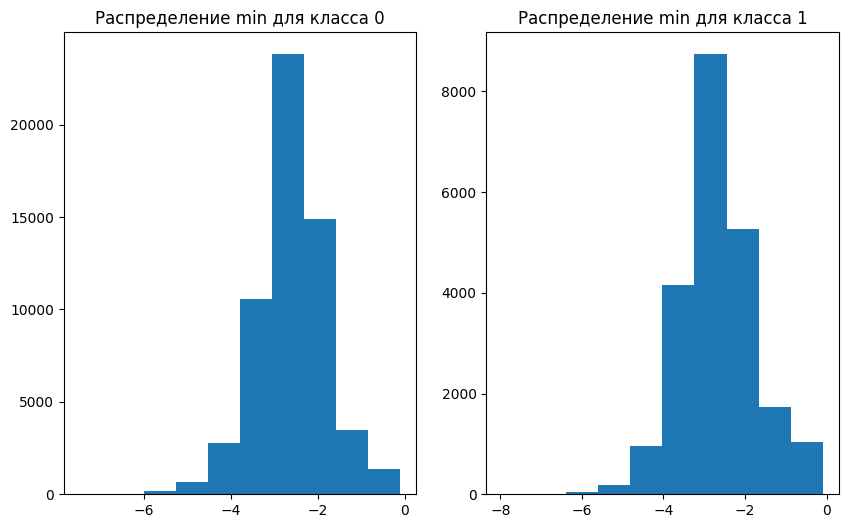

In [16]:
_, axes = plt.subplots(1, 2, figsize=(10, 6))
axes[0].hist(df_train[df_train.label==0]['min'])
axes[0].set_title('Распределение min для класса 0')
axes[1].hist(df_train[df_train.label==1]['min'])
axes[1].set_title('Распределение min для класса 1')
plt.show()

In [17]:
df_train['quantile_25'] = df_train['values'].apply(lambda x: np.percentile(x, 25)) 
df_train['quantile_75'] = df_train['values'].apply(lambda x: np.percentile(x, 75))
df_train['quantile_05'] = df_train['values'].apply(lambda x: np.percentile(x, 5)) 
df_train['quantile_95'] = df_train['values'].apply(lambda x: np.percentile(x, 95))

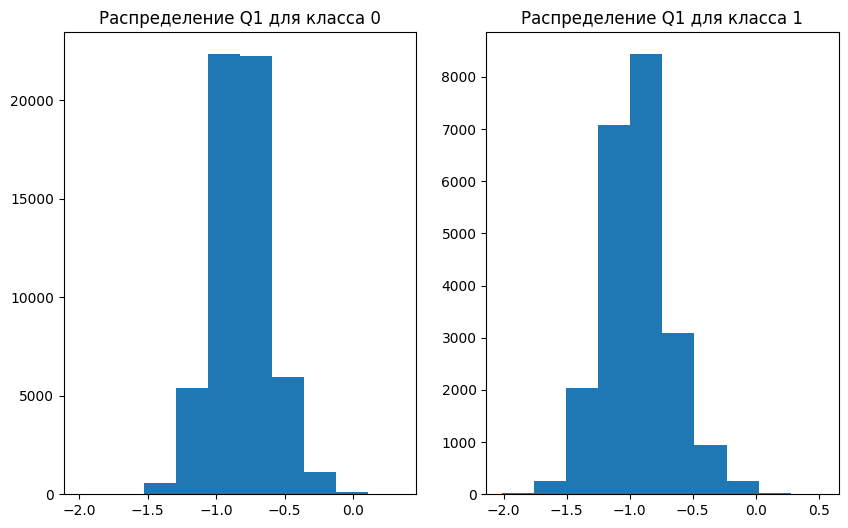

In [18]:
_, axes = plt.subplots(1, 2, figsize=(10, 6))
axes[0].hist(df_train[df_train.label==0]['quantile_25'])
axes[0].set_title('Распределение Q1 для класса 0')
axes[1].hist(df_train[df_train.label==1]['quantile_25'])
axes[1].set_title('Распределение Q1 для класса 1')
plt.show()

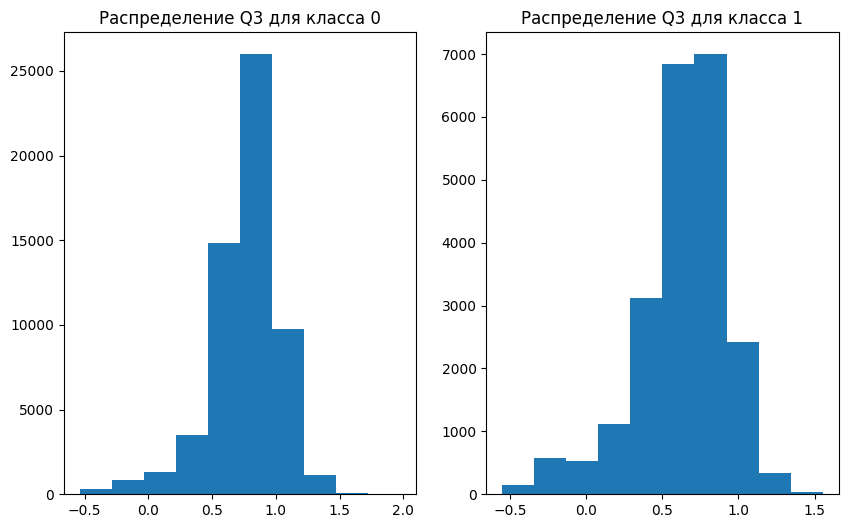

In [19]:
_, axes = plt.subplots(1, 2, figsize=(10, 6))
axes[0].hist(df_train[df_train.label==0]['quantile_75'])
axes[0].set_title('Распределение Q3 для класса 0')
axes[1].hist(df_train[df_train.label==1]['quantile_75'])
axes[1].set_title('Распределение Q3 для класса 1')
plt.show()

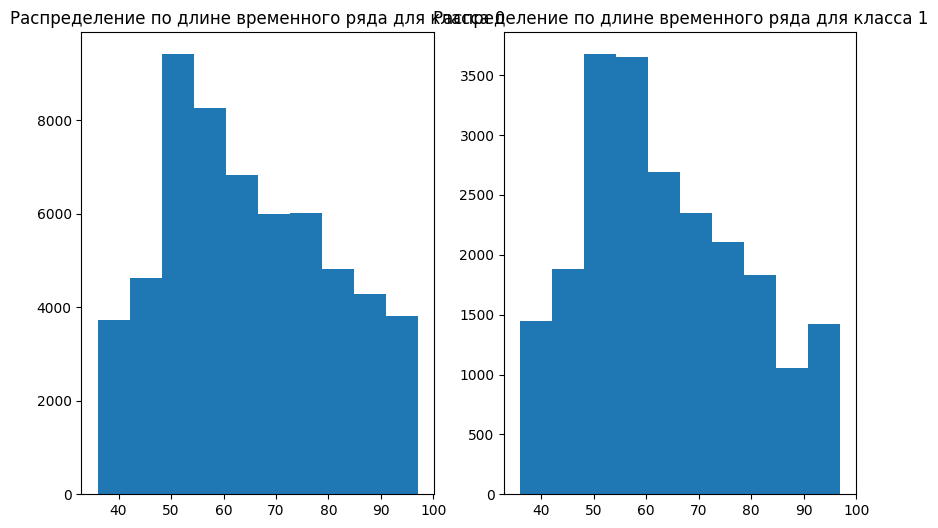

In [20]:
_, axes = plt.subplots(1, 2, figsize=(10, 6))
axes[0].hist(df_train[df_train.label==0]['values'].apply(lambda x: len(x)))
axes[0].set_title('Распределение по длине временного ряда для класса 0')
axes[1].hist(df_train[df_train.label==1]['values'].apply(lambda x: len(x)))
axes[1].set_title('Распределение по длине временного ряда для класса 1')
plt.show()

In [21]:
def weightedmovingaverage(data: pd.Series, period=36):

    total = np.arange(1, period + 1, 1) 
    matrix = data[-period:]
    matrix = total * matrix 
    wma = (matrix.sum()) / (total.sum())
    return wma


In [22]:
df_train['wma'] = df_train['values'].apply(weightedmovingaverage)

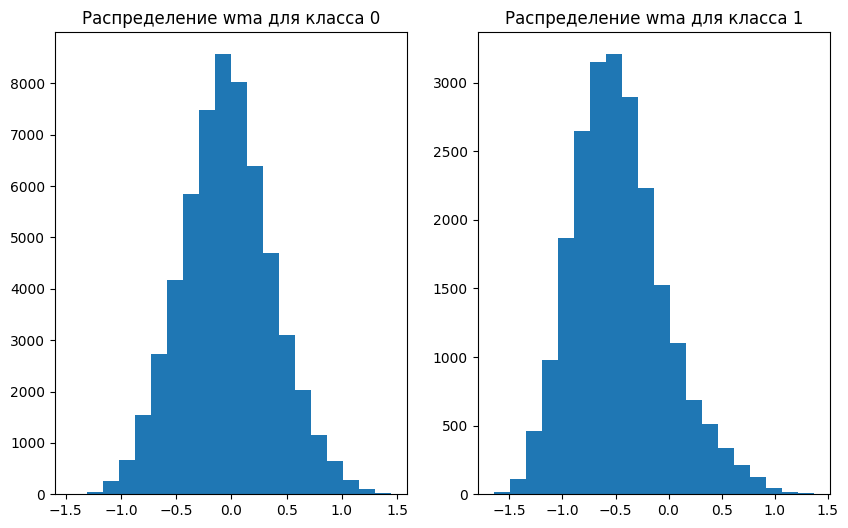

In [23]:
_, axes = plt.subplots(1, 2, figsize=(10, 6))
axes[0].hist(df_train[df_train.label==0]['wma'], bins=20)
axes[0].set_title('Распределение wma для класса 0')
axes[1].hist(df_train[df_train.label==1]['wma'], bins=20)
axes[1].set_title('Распределение wma для класса 1')
plt.show()

In [24]:
def find_best_lag(data, max_lag):
    best_lag = 0
    best_correlation = 0

    for lag in range(1, max_lag + 1):
        shifted_data = np.roll(data, lag)
        
        correlation = np.corrcoef(data[lag:], shifted_data[lag:])[0, 1]

        if correlation > best_correlation:
            best_correlation = correlation
            best_lag = lag

    return best_lag

In [25]:
df_train['most_ac_lag'] = df_train['values'].apply(lambda x: find_best_lag(x, 12))

c:\Users\sonyi\Documents\GitHub\vk_predict\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\sonyi\Documents\GitHub\vk_predict\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [26]:
df_train['ewm_12'] = df_train['values'].apply(lambda x: pd.Series(x[-36:]).ewm(span=12).mean().values[-1])
df_train['ewmstd_12'] = df_train['values'].apply(lambda x: pd.Series(x[-36:]).ewm(span=12).std().values[-1])

<h3>Доминирующая частота в разложении Фурье</h3>

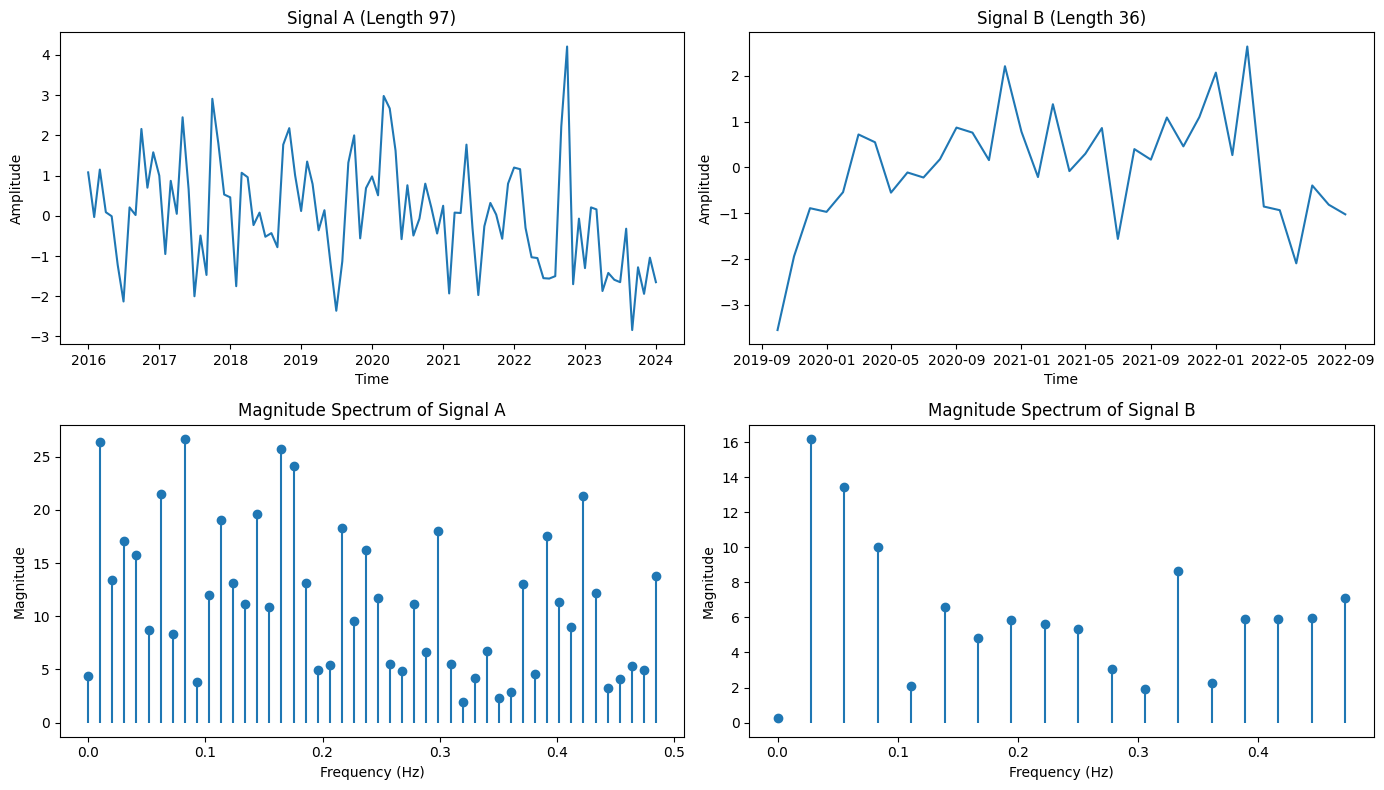

In [27]:
signal_a = df_train.iloc[30]
signal_b = df_train.iloc[537]

fft_a = np.fft.fft(signal_a['values'])
fft_b = np.fft.fft(signal_b['values'])

time_a = signal_a['dates']
time_b = signal_b['dates']

frequencies_a = np.fft.fftfreq(len(time_a), d=1)
frequencies_b = np.fft.fftfreq(len(time_b), d=1)

magnitude_a = np.abs(fft_a)
magnitude_b = np.abs(fft_b)


plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.plot(time_a, signal_a['values'])
plt.title(f'Signal A (Length {len(time_a)})')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(2, 2, 2)
plt.plot(time_b, signal_b['values'])
plt.title(f'Signal B (Length {len(time_b)})')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(2, 2, 3)
plt.stem(frequencies_a[:len(frequencies_a)//2], magnitude_a[:len(magnitude_a)//2], basefmt=" ")
plt.title('Magnitude Spectrum of Signal A')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.subplot(2, 2, 4)
plt.stem(frequencies_b[:len(frequencies_b)//2], magnitude_b[:len(magnitude_b)//2], basefmt=" ")
plt.title('Magnitude Spectrum of Signal B')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()

In [28]:
def find_dominating_frequencies(row: pd.DataFrame, top_n=1):
    '''
    Returns top-n dominating frequencies in fft
    '''
    signal = row['values']
    fft = np.fft.fft(signal)
    time = row['dates']

    frequencies = np.fft.fftfreq(len(time), d=1)
    magnitude = np.abs(fft[frequencies>0]) 
    frequencies = frequencies[frequencies>0]
    

    ind = np.argpartition(magnitude, -top_n)[-top_n:]

    return frequencies[ind]

In [29]:
df_train['dom_freq'] = df_train.apply(lambda x: find_dominating_frequencies(x)[0], axis=1)

In [30]:
def calculate_derivative(df: pd.DataFrame, frame=0):
    values = df['values'][-frame:]
    dates = df['dates'][-frame:]
    dv_dt = np.array([(values[i+1]-values[i])/(dates[i+1].month - dates[i].month + 12 * (dates[i+1].year - dates[i].year)) 
            for i in range(len(values) - 1)])

    return dv_dt

In [31]:
df_train['dv_dt'] = df_train[['dates', 'values']].apply(calculate_derivative, axis=1)
df_train['mean_d'] = df_train['dv_dt'].apply(lambda x: x.mean())
df_train['std_d'] = df_train['dv_dt'].apply(lambda x: x.std())

In [32]:
df_train['mean_1y'] = df_train['values'].apply(lambda x: x[:12].mean())
df_train['mean_2y'] = df_train['values'].apply(lambda x: x[12:24].mean())

<Axes: >

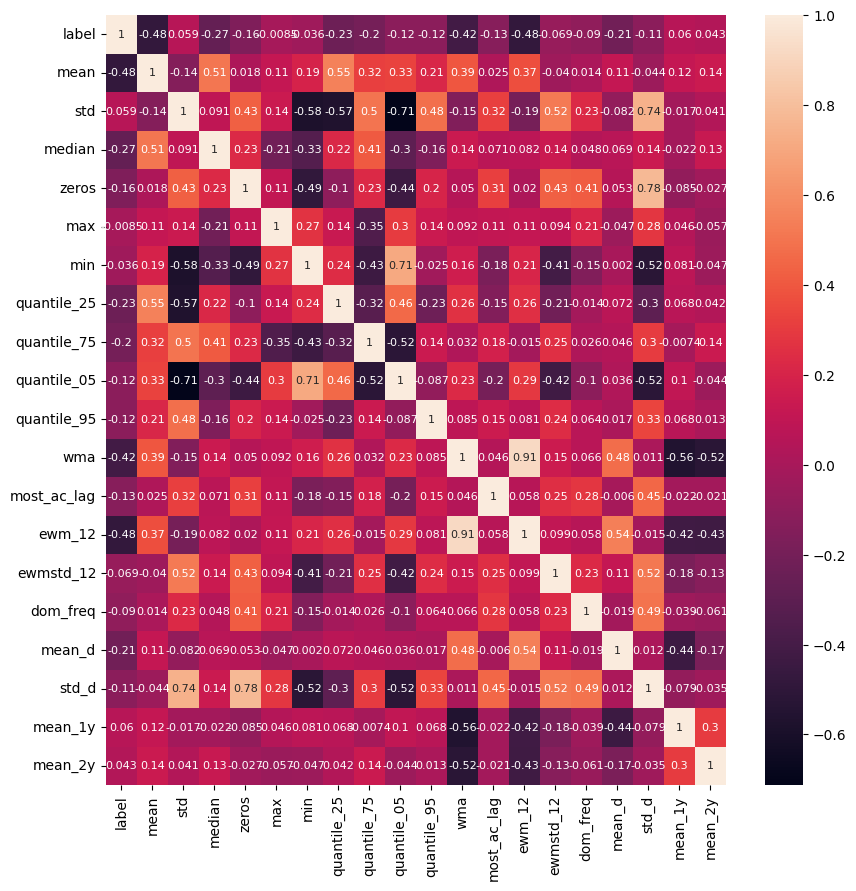

In [33]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_train.drop(['id', 'dates', 'values', 'length', 'dv_dt'], axis=1).corr(), annot=True, ax=ax, annot_kws={"fontsize":8})

Слабо скореллированные признаки (p<0.05) были удалены, а также признаки, имеющие высокое значение корелляции с другими признаками (p>0.7).

<Axes: >

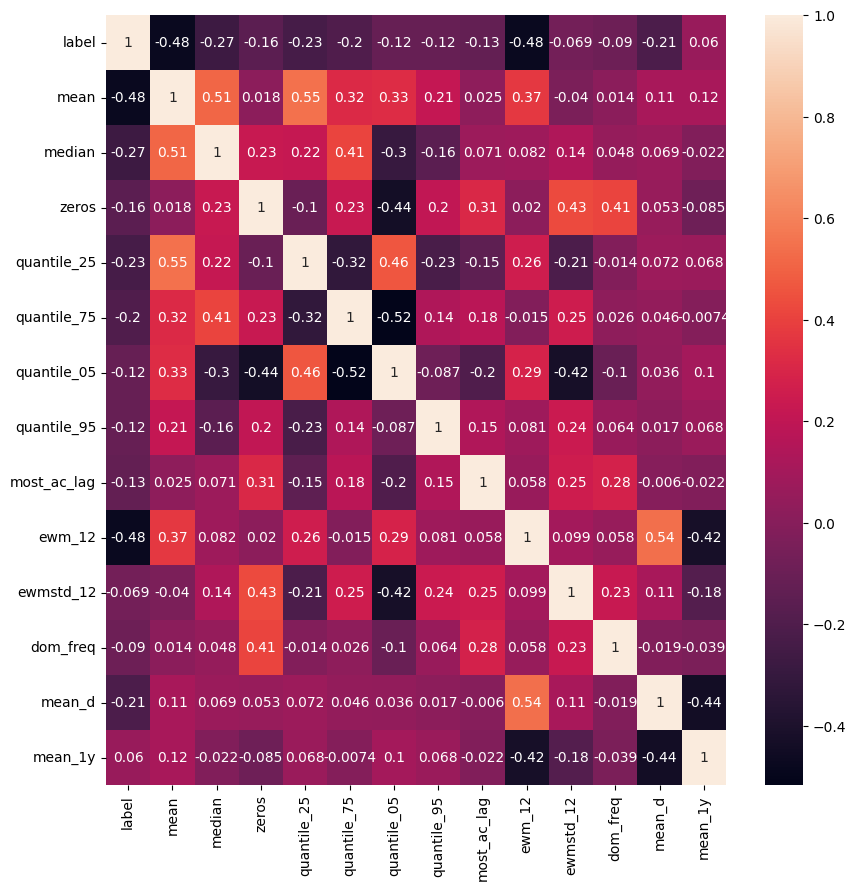

In [34]:
fig, ax = plt.subplots(figsize=(10,10))
df_prep = df_train.drop(['id', 'dates', 'values', 'length', 'dv_dt', 'min', 'max', 'wma', 'std', 'mean_2y', 'std_d'], axis=1)
sns.heatmap(df_prep.corr(), annot=True, ax=ax)

<h3>Model selection and tuning</h3>

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve

np.random.seed(0)

X = df_prep.drop('label', axis=1)
y = df_prep['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


<h4>RandomForestClassifier</h4>

In [36]:
from sklearn.model_selection import GridSearchCV

In [38]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, scoring='roc_auc', verbose=3)

grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV 1/3] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.906 total time=  15.5s
[CV 2/3] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.905 total time=  26.7s
[CV 3/3] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.906 total time=  26.4s
[CV 1/3] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.907 total time=  53.1s
[CV 2/3] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.906 total time= 1.2min
[CV 3/3] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.907 total time=  45.6s
[CV 1/3] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.907 total time=  22.2s
[CV 2/3] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.9

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200]},
             scoring='roc_auc', verbose=3)

ROC AUC: 0.91


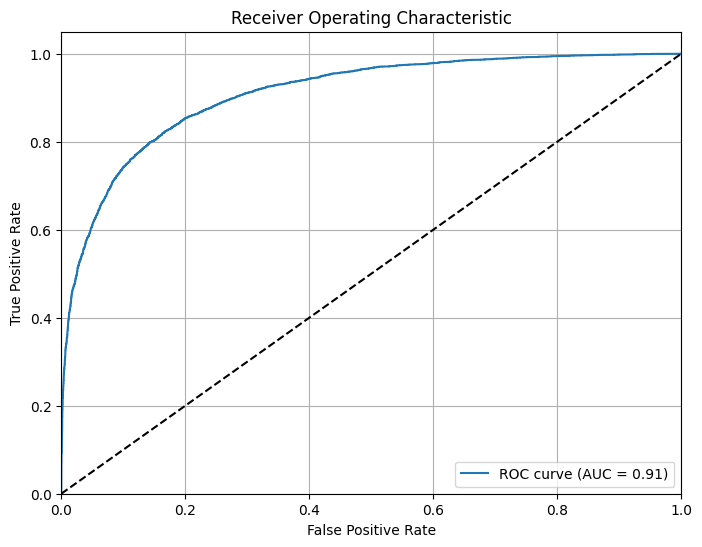

In [49]:
best_rf = grid_rf.best_estimator_

y_probs = best_rf.predict_proba(X_test)[:, 1] 

roc_auc = roc_auc_score(y_test, y_probs)
print(f'ROC AUC: {roc_auc:.2f}')

fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [47]:
import pickle

PATH_TO_MODELS = os.path.join('..', 'models')

In [46]:
with open(os.path.join(PATH_TO_MODELS,'best_rf.pkl'),'wb') as f:
    pickle.dump(best_rf,f)

<h4>XGBClassifier</h4>

In [56]:
import xgboost as xgb

xgb_cl = xgb.XGBClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'seed': [0]
}

grid_xgb = GridSearchCV(estimator=xgb_cl, param_grid=param_grid, 
                           cv=3, scoring='roc_auc', verbose=3)

grid_xgb.fit(X_train, y_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
[CV 1/3] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=50, seed=0, subsample=0.6;, score=0.888 total time=   0.5s
[CV 2/3] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=50, seed=0, subsample=0.6;, score=0.887 total time=   0.3s
[CV 3/3] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=50, seed=0, subsample=0.6;, score=0.886 total time=   0.2s
[CV 1/3] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=50, seed=0, subsample=0.8;, score=0.888 total time=   0.2s
[CV 2/3] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=50, seed=0, subsample=0.8;, score=0.887 total time=   0.2s
[CV 3/3] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=50, seed=0, subsample=0.8;, score=0.886 total time=   0.3s
[CV 1/3] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=50, seed=0, subs

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'seed': [0], 'subsample': [0.6, 0.8, 1.0]},
             scoring='roc_auc', verbose=3)

ROC AUC: 0.91


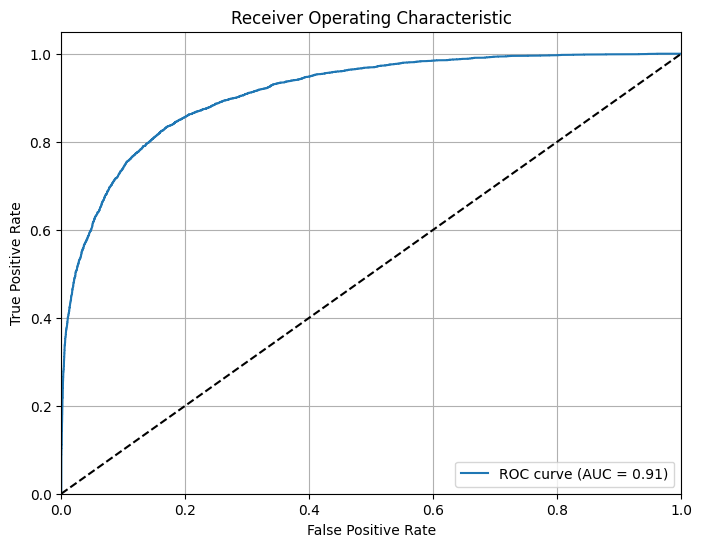

In [57]:
best_xgb = grid_xgb.best_estimator_

y_probs = best_xgb.predict_proba(X_test)[:, 1]  

roc_auc = roc_auc_score(y_test, y_probs)
print(f'ROC AUC: {roc_auc:.2f}')


fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [58]:
with open(os.path.join(PATH_TO_MODELS,'best_xgb.pkl'),'wb') as f:
    pickle.dump(best_xgb,f)

<h3>Time performance evaluation</h3>

In [61]:
from time import time

In [64]:
start = time()
best_xgb.predict_proba(X_test)[:, 1]
end = time()
xgb_time = end - start

In [65]:
start = time()
best_rf.predict_proba(X_test)[:, 1]
end = time()
rf_time = end - start

In [66]:
print(f'Evaluation time for XgbClassifier: {xgb_time}')
print(f'Evaluation time for Random Forest Classifier: {rf_time}')

Evaluation time for XgbClassifier: 0.17223644256591797
Evaluation time for Random Forest Classifier: 1.3898355960845947


**Вывод**: значения целевой метрики получились равными, однако время работы XGBClassifier намного меньше, чем у Random Forest. Далее будет использовать затюненная модель xgb. 